## Reasons breakdown

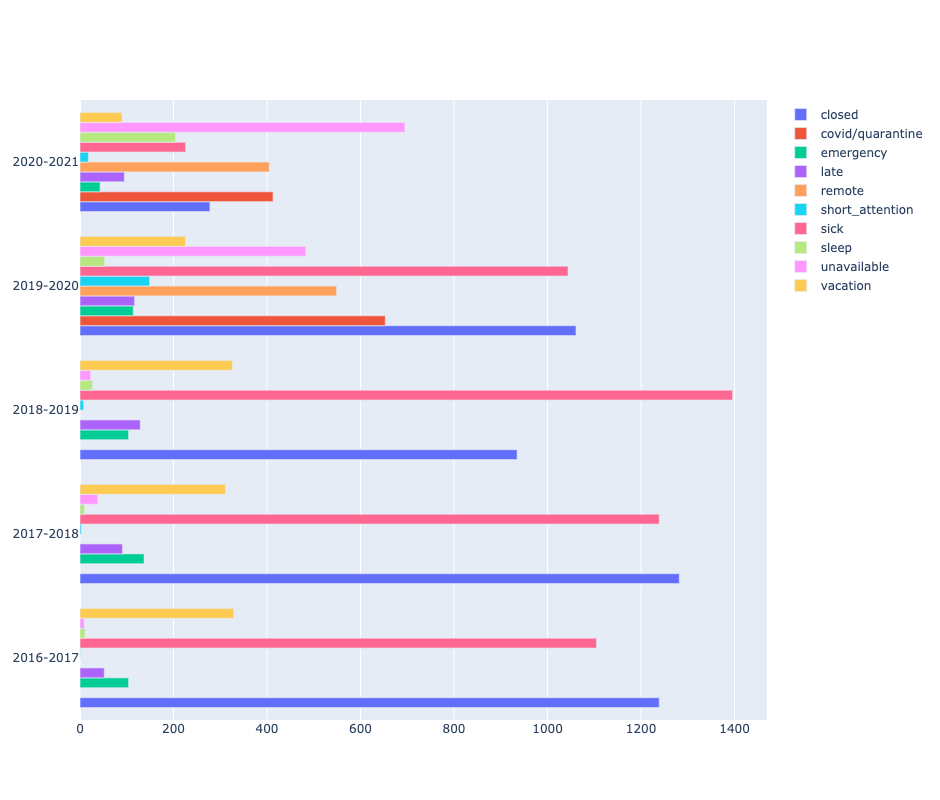

In [21]:
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go


df = pd.read_csv("absent_summary.csv", 
                 names=["school_year", "absent_reason", "absent_count"],
                 header=0, index_col=0)
data = df.to_records()

years = [
    "2016-2017",
    "2017-2018",
    "2018-2019",
    "2019-2020",
    "2020-2021",
]

reason_counts = {}
for y in years:
    reason_counts[y] = {}
    
reasons = {}
for (year, reason, count) in data:
    if reasons.get(reason):
        reasons[reason].append(count)
    else:
        reasons[reason] = [count]
    
    
fig = go.Figure()
for reason in reasons:
    fig.add_trace(go.Bar(y=years, x=reasons[reason], name=reason,  orientation='h'))
    
fig.update_layout(
    autosize=True,
    width=1000,
    height=800,
)

fig.show()


In [7]:
# fig2 = go.Figure()
# for reason in reasons:
#     fig2.add_trace(go.Bar(x=years, y=reasons[reason], name=reason))
    
# fig2.update_layout(
#     autosize=True,
#     width=1000,
#     height=800,
# )

# fig2.show()

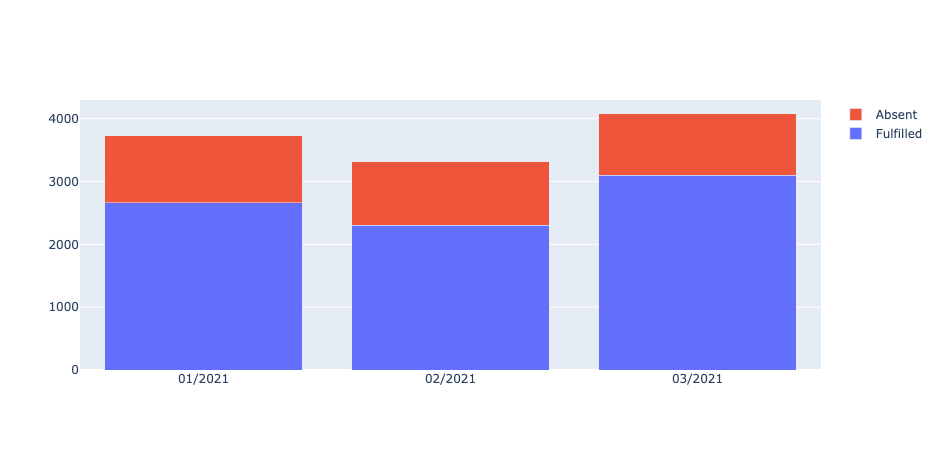

In [8]:
months = ['01/2021', '02/2021', '03/2021']
monthly_absent_hours = [1062, 1014, 985]
monthly_mandated_hours = [3724.25, 3317.83, 4082]
monthly_fulfilled_hours = [x - y for x, y in zip(monthly_mandated_hours, monthly_absent_hours)]
mandated_vs_absent_fig = go.Figure(data=[
    go.Bar(name='Fulfilled', x=months, y=monthly_fulfilled_hours),
    go.Bar(name='Absent', x=months, y=monthly_absent_hours)
])
mandated_vs_absent_fig.update_layout(barmode='stack')
mandated_vs_absent_fig.show()

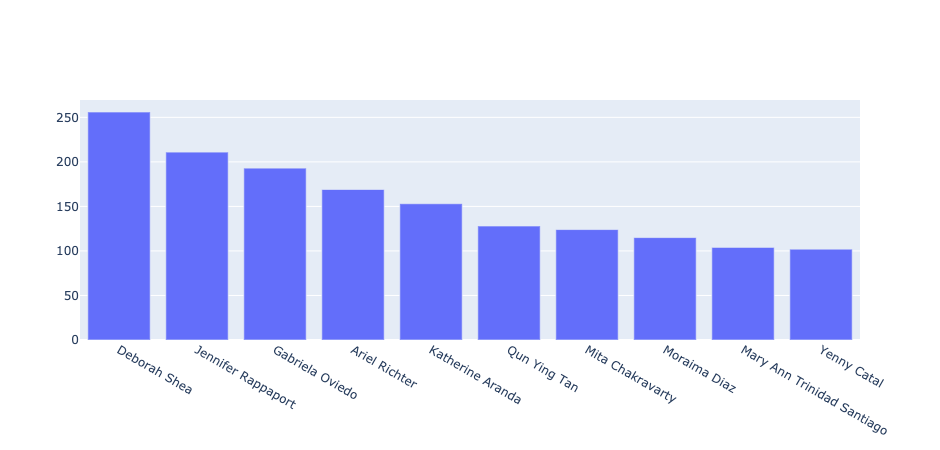

In [18]:
child_absent_df = pd.read_csv("child_absent.csv", 
                 names=["name", "count"],
                 header=0)
child_absent_top_10 = child_absent_df.head(10)
child_absent_fig = go.Figure(data=[
    go.Bar(x=child_absent_top_10['name'], y=child_absent_top_10["count"])
])

# child_absent_fig.update_layout(barmode='stack')
child_absent_fig.show()

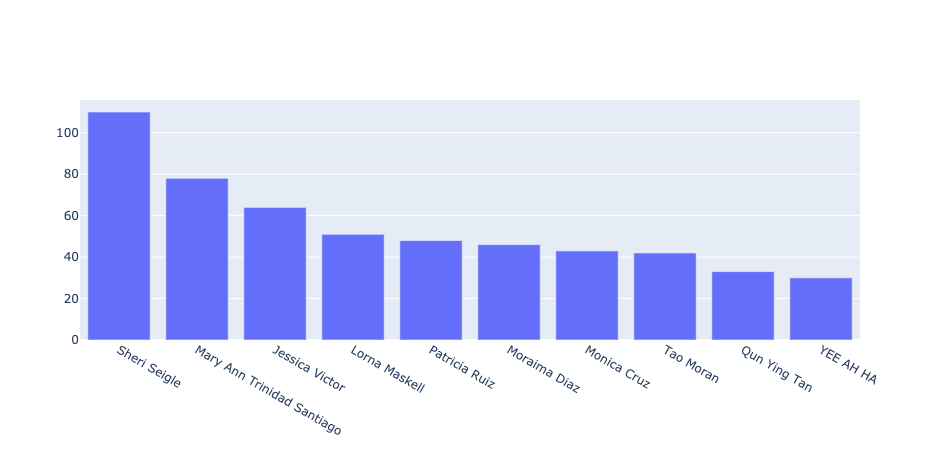

In [19]:
provider_absent_df = pd.read_csv("provider_absent.csv", 
                 names=["name", "count"],
                 header=0)
provider_absent_top_10 = provider_absent_df.head(10)
provider_absent_fig = go.Figure(data=[
    go.Bar(x=provider_absent_top_10['name'], y=provider_absent_top_10["count"])
])

# child_absent_fig.update_layout(barmode='stack')
provider_absent_fig.show()

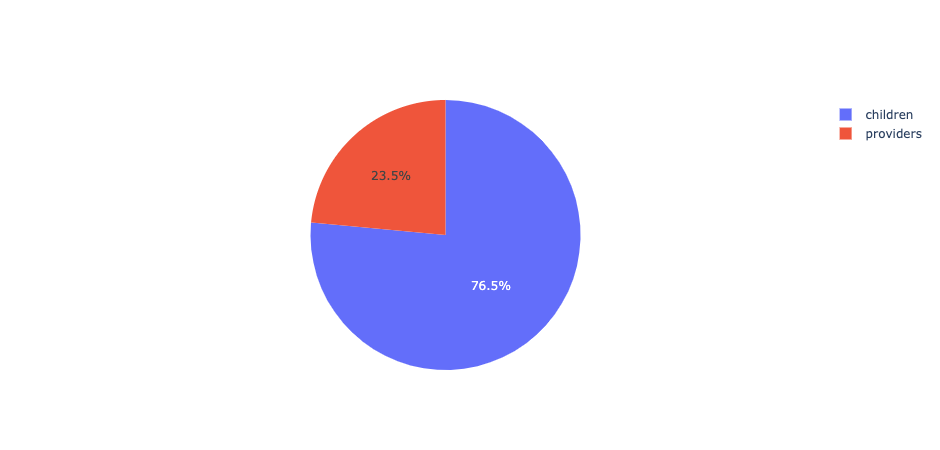

In [20]:
provider_absent_2020 = 1097
child_absent_2020 = 3567
# select case pupil_service when 1 then 'child' when 6 then 'child' when 7 then 'child' when 3 then 'provider' when 5 then 'provider' end from case_session_notes as note where note.deleted_at is null and note.starts_date >= '07/01/2020' and note.starts_date< '07/01/2021' and note.pupil_service = any('{1, 6, 7, 3, 5}'::int[]);marie_pense=> with x as (select case pupil_service when 1 then 'child' when 6 then 'child' when 7 then 'child' when 3 then 'provider' when 5 then 'provider' end as who from case_session_notes as note  where note.deleted_at is null and note.starts_date >= '07/01/2020' and note.starts_date< '07/01/2021' and note.pupil_service = any('{1, 6, 7, 3, 5}'::int[])) select who, count(1) from x group by 1;

absent_proportion_fig = go.Figure(data=[
    go.Pie(labels=["providers", "children"], values=[1097, 3567])
])
absent_proportion_fig.show()